In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv


In [2]:
train_dataset = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2022/train.csv')
train_dataset.head()

row_id        date  country       store         product  num_sold
0       0  2015-01-01  Finland  KaggleMart      Kaggle Mug       329
1       1  2015-01-01  Finland  KaggleMart      Kaggle Hat       520
2       2  2015-01-01  Finland  KaggleMart  Kaggle Sticker       146
3       3  2015-01-01  Finland  KaggleRama      Kaggle Mug       572
4       4  2015-01-01  Finland  KaggleRama      Kaggle Hat       911

## About Dataset

In [3]:
train_dataset.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [4]:
train_dataset.shape

(26298, 6)

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [6]:
print("There are " + str(train_dataset['country'].unique()))
print("There are " + str(train_dataset['store'].unique()))
print("There are " + str(len(train_dataset['num_sold'].unique())) +" number of unique product out of " + str(len(train_dataset['num_sold'])))

There are ['Finland' 'Norway' 'Sweden']
There are ['KaggleMart' 'KaggleRama']
There are 1377 number of unique product out of 26298


In [7]:
train_dataset.describe()

row_id      num_sold
count  26298.000000  26298.000000
mean   13148.500000    387.533577
std     7591.723026    266.076193
min        0.000000     70.000000
25%     6574.250000    190.000000
50%    13148.500000    315.000000
75%    19722.750000    510.000000
max    26297.000000   2884.000000

## Kaggle's Sales overall

Text(0.5, 1.0, 'Overall Sales')

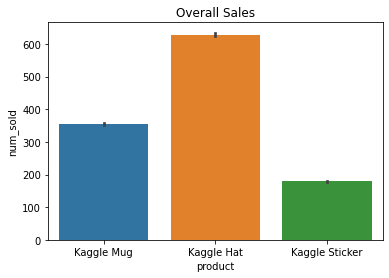

In [8]:
sns.barplot(x = train_dataset['product'], y= train_dataset['num_sold'], data= train_dataset).set_title("Overall Sales")

## Kaggle's Sales by Country/Store

Text(0.5, 1.0, 'Sales by Country/Store')

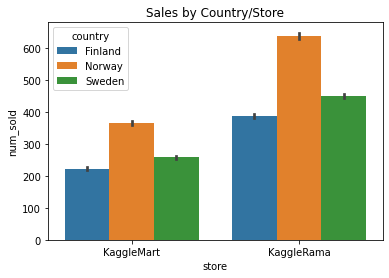

In [9]:
sns.barplot( x=train_dataset['store'], y = train_dataset['num_sold'], data= train_dataset, hue=train_dataset['country']).set_title("Sales by Country/Store")

## Kaggle's Sales by Country

In [10]:
Finland_data = train_dataset[train_dataset['country']=='Finland'].groupby('product')['num_sold'].sum()
Norway_data = train_dataset[train_dataset['country']=='Norway'].groupby('product')['num_sold'].sum()
Sweden_data = train_dataset[train_dataset['country']=='Sweden'].groupby('product')['num_sold'].sum()

In [11]:
fig = plt.figure(figsize=(18,10), dpi=1600)
ax1 = plt.subplot2grid((1,3),(0,0))
Finland_sales_data= [Finland_data.values[0],
                     Finland_data.values[1],
                     Finland_data.values[2]]
Finland_product_labels = [Finland_data.index[0],
                          Finland_data.index[1],
                          Finland_data.index[2]]
plt.title('Finland Product Sales')
plt.pie(Finland_sales_data, labels = Finland_product_labels, autopct='%1.2f%%')


ax1 = plt.subplot2grid((1,3),(0,1))
Norway_sales_data= [Norway_data.values[0], 
                    Norway_data.values[1], 
                    Norway_data.values[2]]
Norway_product_labels = [Norway_data.index[0],
                         Norway_data.index[1],
                         Norway_data.index[2]]
plt.title('Norway Product Sales')
plt.pie(Norway_sales_data, labels = Norway_product_labels, autopct='%1.2f%%')


ax1 = plt.subplot2grid((1,3),(0,2))
Sweden_sales_data= [Sweden_data.values[0], Sweden_data.values[1], Sweden_data.values[2]]
Sweden_product_labels = [Sweden_data.index[0], Sweden_data.index[1], Sweden_data.index[2]]
plt.title('Sweden Product Sales')
plt.pie(Sweden_sales_data, labels = Sweden_product_labels, autopct='%1.2f%%')
plt.show()

## Kaggle's Sales by Store

In [12]:
KaggleMart_data = train_dataset[train_dataset['store']=='KaggleMart'].groupby('product')['num_sold'].sum()
KaggleRama_data = train_dataset[train_dataset['store']=='KaggleRama'].groupby('product')['num_sold'].sum()

In [13]:
fig = plt.figure(figsize=(18,10), dpi=1600)
ax1 = plt.subplot2grid((1,2),(0,0))
KaggleMart_sales_data= [KaggleMart_data.values[0],
                         KaggleMart_data.values[1],
                         KaggleMart_data.values[2]]
KaggleMart_product_labels = [KaggleMart_data.index[0],
                             KaggleMart_data.index[1],
                             KaggleMart_data.index[2]]
plt.title('KaggleMartProduct Sales')
plt.pie(KaggleMart_sales_data, labels = KaggleMart_product_labels, autopct='%1.2f%%')


ax1 = plt.subplot2grid((1,2),(0,1))
KaggleRama_sales_data= [KaggleRama_data.values[0],
                        KaggleRama_data.values[1],
                        KaggleRama_data.values[2]]
KaggleRama_product_labels = [KaggleRama_data.index[0],
                             KaggleRama_data.index[1],
                             KaggleRama_data.index[2]]
plt.title('KaggleRama Product Sales')
plt.pie(KaggleRama_sales_data, labels = KaggleRama_product_labels, autopct='%1.2f%%')
plt.show()

In [14]:
train_dataset['date']=pd.to_datetime(train_dataset['date'])
train_dataset['Day']= train_dataset['date'].dt.day
train_dataset['Week']= train_dataset['date'].dt.week
train_dataset['Year']= train_dataset['date'].dt.year
train_dataset['dayofweek'] = train_dataset['date'].dt.dayofweek
train_dataset['dayofmonth'] = train_dataset['date'].dt.days_in_month
train_dataset['dayofyear'] = train_dataset['date'].dt.dayofyear
train_dataset['weekday'] = train_dataset['date'].dt.weekday
train_dataset.head()

row_id       date  country       store         product  num_sold  Day  \
0       0 2015-01-01  Finland  KaggleMart      Kaggle Mug       329    1   
1       1 2015-01-01  Finland  KaggleMart      Kaggle Hat       520    1   
2       2 2015-01-01  Finland  KaggleMart  Kaggle Sticker       146    1   
3       3 2015-01-01  Finland  KaggleRama      Kaggle Mug       572    1   
4       4 2015-01-01  Finland  KaggleRama      Kaggle Hat       911    1   

   Week  Year  dayofweek  dayofmonth  dayofyear  weekday  
0     1  2015          3          31          1        3  
1     1  2015          3          31          1        3  
2     1  2015          3          31          1        3  
3     1  2015          3          31          1        3  
4     1  2015          3          31          1        3

## Finland sales by Day/Week/Year

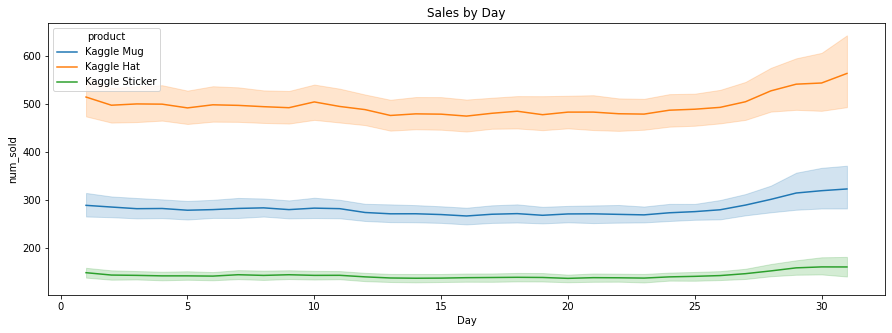

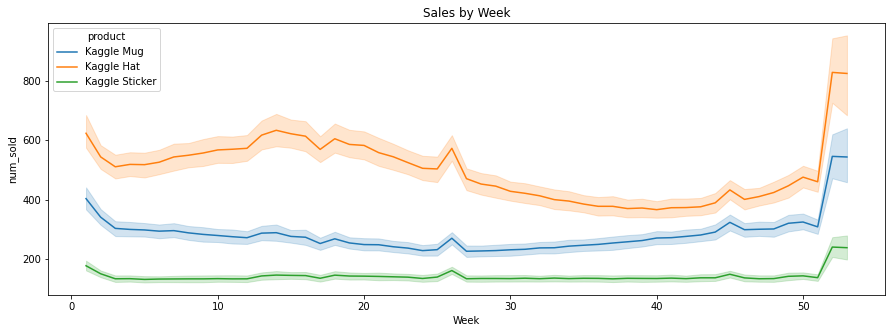

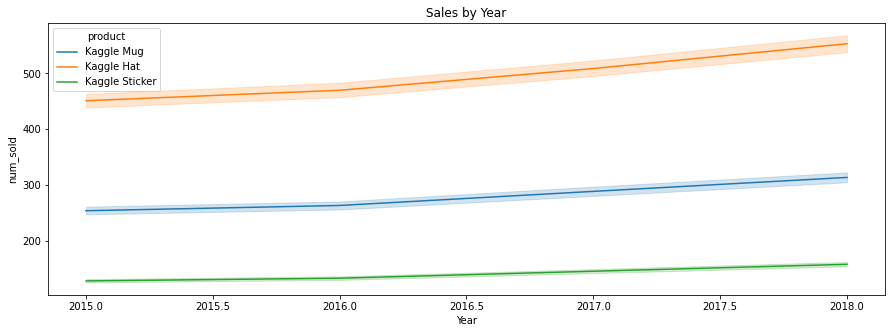

In [15]:
date_list = ["Day", "Week", "Year"]
title_list = ["Sales by Day", "Sales by Week", "Sales by Year"]
for i in range(0, len(date_list)):
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data =train_dataset[train_dataset['country']=='Finland'],
                 x=date_list[i], 
                 y ="num_sold", 
                 hue="product").set_title(title_list[i])

## Norway sales by Day/Week/Year

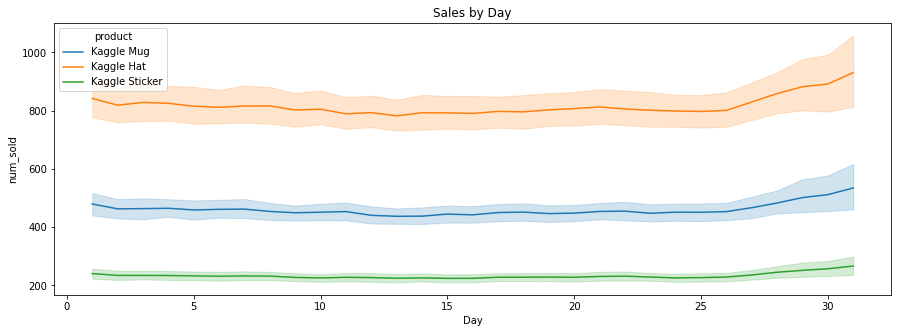

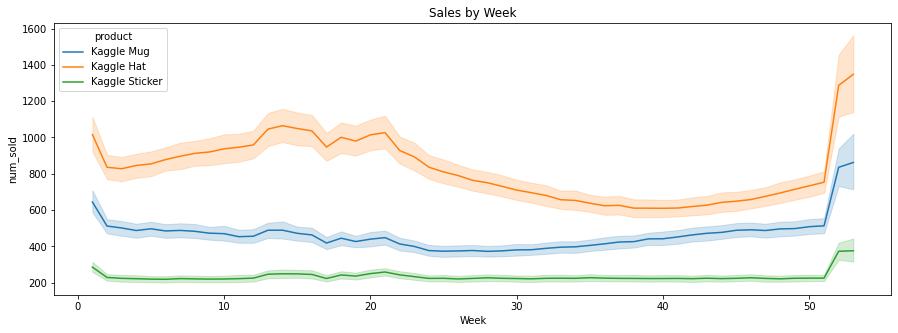

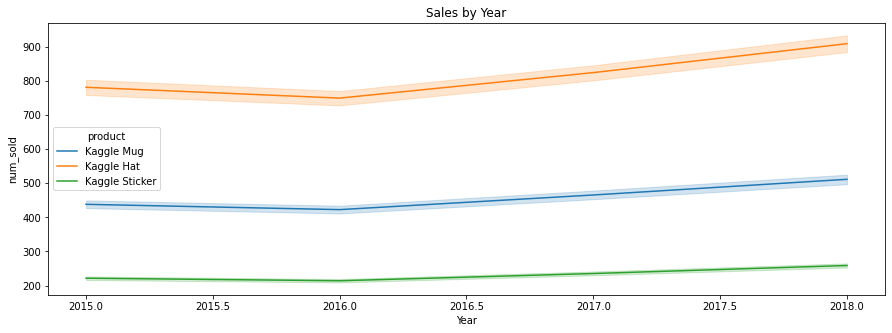

In [16]:
for i in range(0, len(date_list)):
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data =train_dataset[train_dataset['country']=='Norway'],
                 x=date_list[i], 
                 y ="num_sold", 
                 hue="product").set_title(title_list[i])

## Sweden sales by Day/Week/Year

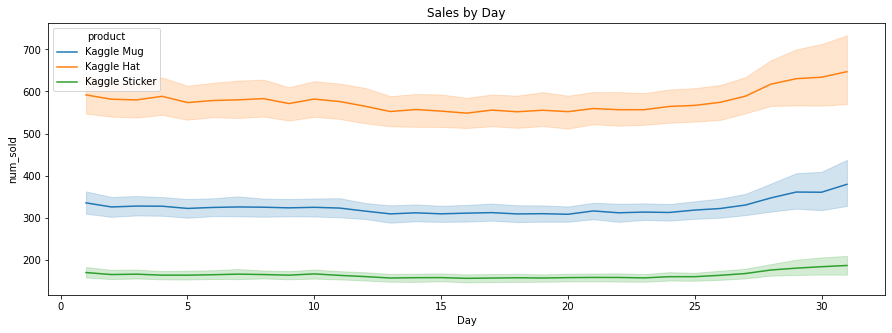

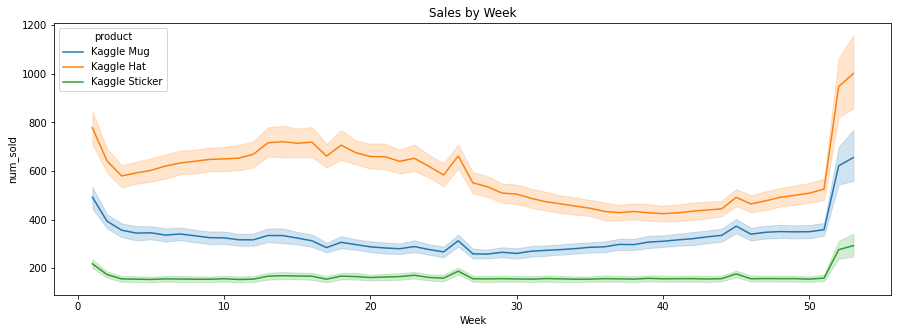

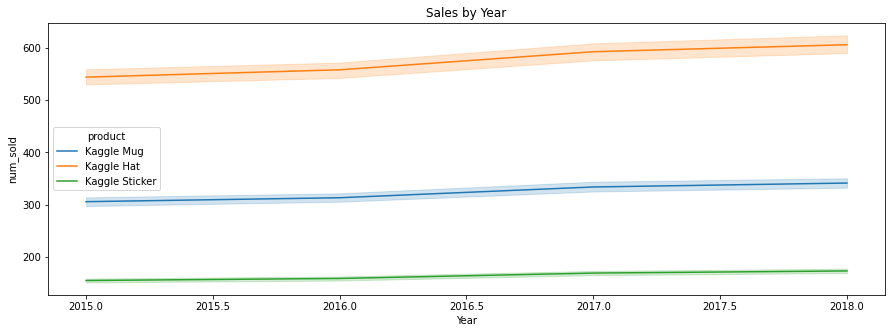

In [17]:
for i in range(0, len(date_list)):
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data =train_dataset[train_dataset['country']=='Sweden'],
                 x=date_list[i], 
                 y ="num_sold", 
                 hue="product").set_title(title_list[i])

## Transfrom String to Numberic using LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['country', 'product', 'store']:
    train_dataset[col] = le.fit_transform(train_dataset[col])

In [19]:
train_dataset.head()

row_id       date  country  store  product  num_sold  Day  Week  Year  \
0       0 2015-01-01        0      0        1       329    1     1  2015   
1       1 2015-01-01        0      0        0       520    1     1  2015   
2       2 2015-01-01        0      0        2       146    1     1  2015   
3       3 2015-01-01        0      1        1       572    1     1  2015   
4       4 2015-01-01        0      1        0       911    1     1  2015   

   dayofweek  dayofmonth  dayofyear  weekday  
0          3          31          1        3  
1          3          31          1        3  
2          3          31          1        3  
3          3          31          1        3  
4          3          31          1        3

## Process test dataset just like train dataset

In [20]:
test_dataset = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2022/test.csv')
test_dataset.head()

row_id        date  country       store         product
0   26298  2019-01-01  Finland  KaggleMart      Kaggle Mug
1   26299  2019-01-01  Finland  KaggleMart      Kaggle Hat
2   26300  2019-01-01  Finland  KaggleMart  Kaggle Sticker
3   26301  2019-01-01  Finland  KaggleRama      Kaggle Mug
4   26302  2019-01-01  Finland  KaggleRama      Kaggle Hat

In [21]:
test_dataset['date']=pd.to_datetime(test_dataset['date'])
test_dataset['Day']= test_dataset['date'].dt.day
test_dataset['Week']= test_dataset['date'].dt.week
test_dataset['Year']= test_dataset['date'].dt.year
test_dataset['dayofweek'] = test_dataset['date'].dt.dayofweek
test_dataset['dayofmonth'] = test_dataset['date'].dt.days_in_month
test_dataset['dayofyear'] = test_dataset['date'].dt.dayofyear
test_dataset['weekday'] = test_dataset['date'].dt.weekday
test_dataset.head()

row_id       date  country       store         product  Day  Week  Year  \
0   26298 2019-01-01  Finland  KaggleMart      Kaggle Mug    1     1  2019   
1   26299 2019-01-01  Finland  KaggleMart      Kaggle Hat    1     1  2019   
2   26300 2019-01-01  Finland  KaggleMart  Kaggle Sticker    1     1  2019   
3   26301 2019-01-01  Finland  KaggleRama      Kaggle Mug    1     1  2019   
4   26302 2019-01-01  Finland  KaggleRama      Kaggle Hat    1     1  2019   

   dayofweek  dayofmonth  dayofyear  weekday  
0          1          31          1        1  
1          1          31          1        1  
2          1          31          1        1  
3          1          31          1        1  
4          1          31          1        1

In [22]:
le = LabelEncoder()
for col in ['country', 'product', 'store']:
    test_dataset[col] = le.fit_transform(test_dataset[col])

In [23]:
test_dataset.head()

row_id       date  country  store  product  Day  Week  Year  dayofweek  \
0   26298 2019-01-01        0      0        1    1     1  2019          1   
1   26299 2019-01-01        0      0        0    1     1  2019          1   
2   26300 2019-01-01        0      0        2    1     1  2019          1   
3   26301 2019-01-01        0      1        1    1     1  2019          1   
4   26302 2019-01-01        0      1        0    1     1  2019          1   

   dayofmonth  dayofyear  weekday  
0          31          1        1  
1          31          1        1  
2          31          1        1  
3          31          1        1  
4          31          1        1

## Drop date in the train/test dataset

In [24]:
train_dataset.drop('date', axis = 1, inplace = True)
test_dataset.drop('date', axis = 1, inplace = True)

In [25]:
X =train_dataset.loc[:, train_dataset.columns!='num_sold']
y =train_dataset.loc[:, train_dataset.columns=='num_sold']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## XGBRegressor

In [27]:
import xgboost as xgb
model_xgboost= xgb.XGBRegressor(tree_method='hist')
model_xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='hist',
             validate_parameters=1, verbosity=None)

In [28]:
xgboost_score =model_xgboost.score(X_test,y_test)
xgboost_pred_score =round(xgboost_score*100,2)
xgboost_pred_score

98.67

In [29]:
test_pred_xgboost = model_xgboost.predict(test_dataset)
test_pred_xgboost

array([ 431.27643,  601.0739 ,  173.75882, ..., 1021.01404, 1434.693  ,
        386.06052], dtype=float32)

## CatBoostRegressor

In [30]:
from catboost import CatBoostRegressor

model_catboost = CatBoostRegressor(iterations=10000,
                          learning_rate=0.005,
                          eval_metric='SMAPE')
model_catboost.fit(X_train,y_train, early_stopping_rounds=1000, verbose=10000)

0:	learn: 52.2976237	total: 53.8ms	remaining: 8m 58s
9999:	learn: 4.2299234	total: 28s	remaining: 0us


In [31]:
catboost_score =model_catboost.score(X_test,y_test)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

-1303824.0

It seems normal way of modeling it using catboostregressor doesn't work, and takes too much time. So, I decided to use TimeSeriesSplit to split time series data samples that are observed at fixed time intervals, in train/test sets.

In [32]:
train_catboost =train_dataset.loc[:, train_dataset.columns!='num_sold']
y_catboost =train_dataset.loc[:, train_dataset.columns=='num_sold']

In [33]:
from sklearn.model_selection import TimeSeriesSplit
kfold = TimeSeriesSplit(20)

In [34]:
test_pred = []
for fold, (train_id, test_id) in enumerate(kfold.split(train_catboost)):
    print('<------- fold', fold+1, '------->')
    x_train, y_train = train_catboost.iloc[train_id], y_catboost.iloc[train_id]
    x_valid, y_valid = train_catboost.iloc[test_id], y_catboost.iloc[test_id]
    params = {
        'eval_metric': 'SMAPE',
        'iterations': 10000,
    }
    cat = CatBoostRegressor(**params)
    cat.fit(x_train, y_train, eval_set = (x_valid, y_valid), verbose = 1000, early_stopping_rounds = 2000)
    test_pred.append(cat.predict(test_dataset))

<------- fold 1 ------->
Learning rate set to 0.012958
0:	learn: 54.0311229	test: 57.2060800	best: 57.2060800 (0)	total: 1.33ms	remaining: 13.3s
1000:	learn: 3.6544736	test: 8.9009324	best: 8.8828407 (903)	total: 737ms	remaining: 6.62s
2000:	learn: 3.2812539	test: 8.9291423	best: 8.8828407 (903)	total: 1.38s	remaining: 5.5s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 8.882840707
bestIteration = 903

Shrink model to first 904 iterations.
<------- fold 2 ------->
Learning rate set to 0.014443
0:	learn: 55.7290014	test: 56.6330136	best: 56.6330136 (0)	total: 931us	remaining: 9.32s
1000:	learn: 4.0519040	test: 17.6083663	best: 14.0816180 (307)	total: 877ms	remaining: 7.88s
2000:	learn: 3.6993416	test: 17.7070295	best: 14.0816180 (307)	total: 1.78s	remaining: 7.1s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 14.08161799
bestIteration = 307

Shrink model to first 308 iterations.
<------- fold 3 ------->
Learning rate set to 0.01539
0:	learn: 55.

In [35]:
test_pred_result = np.mean(test_pred, axis = 0)

In [36]:
sample_sub = pd.read_csv('../input/tabular-playground-series-jan-2022/sample_submission.csv')
sample_sub.head()

row_id  num_sold
0   26298       100
1   26299       100
2   26300       100
3   26301       100
4   26302       100

In [37]:
sample_sub['num_sold'] = test_pred_result
sample_sub.head()

row_id    num_sold
0   26298  308.371376
1   26299  486.577965
2   26300  143.525300
3   26301  522.220627
4   26302  823.824962

In [38]:
sample_sub.to_csv("submission.csv", index=False)